# Retrieve, patchify and plot map(s)

Refer to [the installation section in README](https://github.com/Living-with-machines/MapReader#installation) to install `mapreader`.

In [2]:
# solve issue with autocomplete
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Download maps via tileserver

`tileserver` provides an easy way to download maps from, e.g.,

* OS one-inch 2nd edition layer: https://mapseries-tilesets.s3.amazonaws.com/1inch_2nd_ed/index.html
* OS six-inch 1st edition layer for Scotland at: https://mapseries-tilesets.s3.amazonaws.com/os/6inchfirst/index.html
* ...

By default, we use the `download_url` of OS one-inch 2nd edition layer:
"https://mapseries-tilesets.s3.amazonaws.com/1inch_2nd_ed/{z}/{x}/{y}.png"

This can be changed to OS six-inch 1st edition layer (Scotland) by specifying `download_url`.

**To access other map series, please contact NLS.**

In [3]:
from mapreader import TileServer

tileserver = TileServer(metadata_path="../../../mapreader/persistent_data/metadata_OS_One_Inch_GB_WFS_light.json",
                        download_url="https://mapseries-tilesets.s3.amazonaws.com/1inch_2nd_ed/{z}/{x}/{y}.png")

# the default value of download_url:
# "https://mapseries-tilesets.s3.amazonaws.com/1inch_2nd_ed/{z}/{x}/{y}.png"

Metada file has 480 items.
Download URL: https://mapseries-tilesets.s3.amazonaws.com/1inch_2nd_ed/{z}/{x}/{y}.png
Geometry: polygone


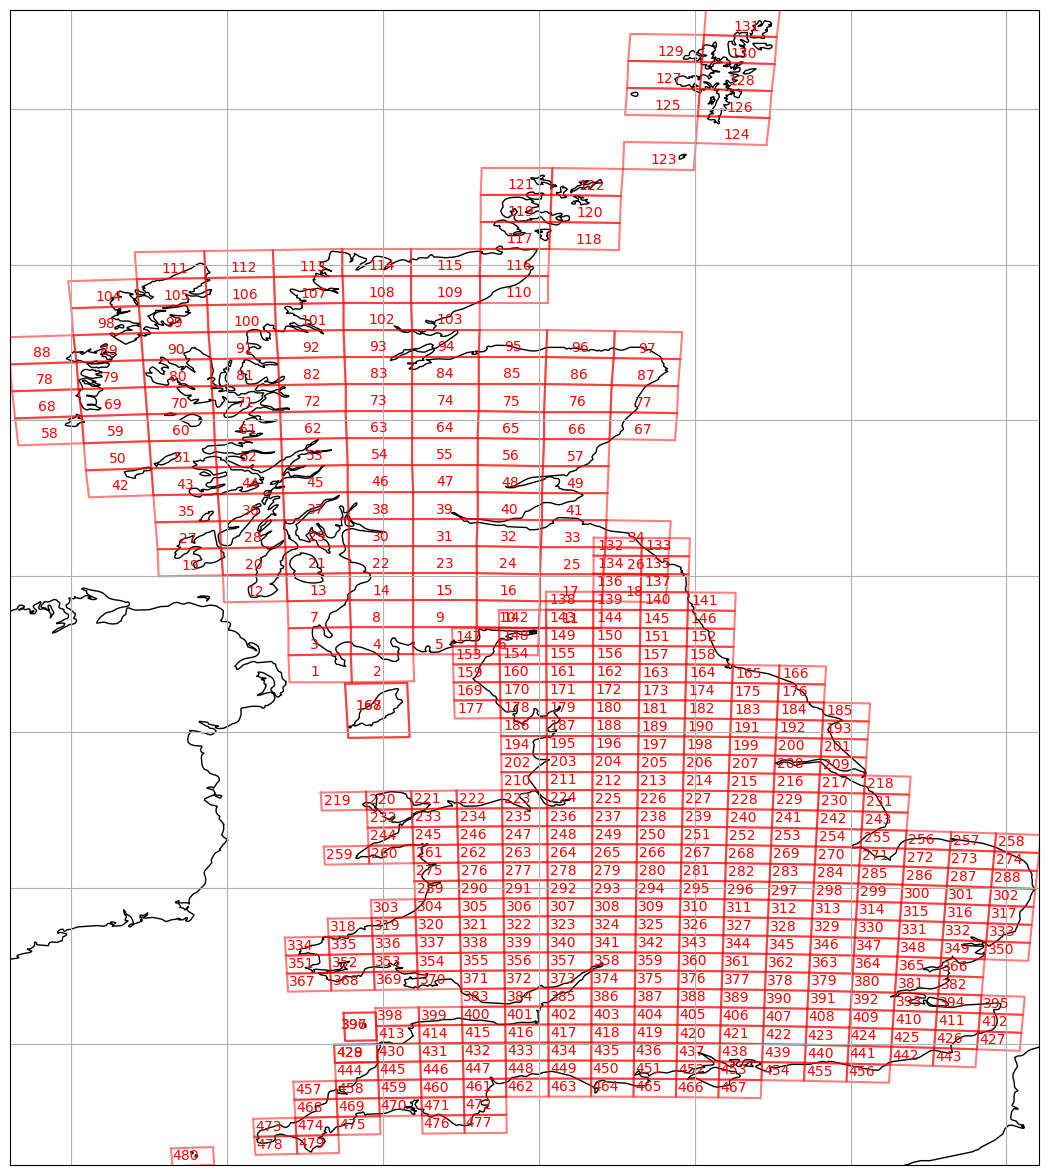

In [4]:
tileserver.plot_metadata_on_map(map_extent="uk", add_text=True)

In [1]:
# It is possible to modify the read metadata:
# tileserver.modify_metadata(remove_image_ids=["101168618"])

# # in the case of 1" maps, list2remove=['167', '396', '428'] would remove all duplicated maps
# tileserver.plot_metadata_on_map(list2remove=['167', '396', '428'],
#                                 map_extent="uk")

In [5]:
# To get the min/max of lats/lons (all maps read from metadata_path)
tileserver.minmax_latlon()

Min/Max Lon: -8.11999993, 1.83188116
Min/Max Lat: 49.82091681, 60.97000003


Min/Max published dates: 1873, 1909


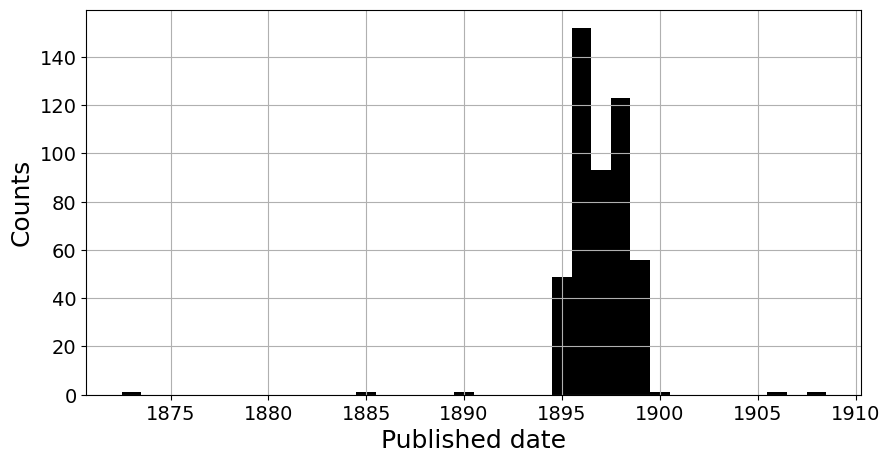

In [6]:
tileserver.hist_published_dates()


## Query maps using a list of lats/lons

In [7]:
tileserver.query_point([51.53, -0.12])
# # if append = False, only the last query will be stored
tileserver.query_point([51.4, 0.08], append=True)
tileserver.query_point([51.4, -0.13], append=True)
tileserver.query_point([51.52, 0.03], append=True)

In [8]:
# To print all found queries
tileserver.print_found_queries()

------------
Found items:
------------
URL:     	https://maps.nls.uk/view/101168609
filepath:	map_101168609.png
coords:  	[-4.06538210e-01  2.07213000e-02  5.15026204e+01  5.16848974e+01]
index:   	378
URL:     	https://maps.nls.uk/view/101168708
filepath:	map_101168708.png
coords:  	[2.60010000e-04 4.27238360e-01 5.13189766e+01 5.15026204e+01]
index:   	391
URL:     	https://maps.nls.uk/view/101168702
filepath:	map_101168702.png
coords:  	[-4.15144570e-01  1.04388000e-02  5.13292371e+01  5.15114618e+01]
index:   	390
URL:     	https://maps.nls.uk/view/101168618
filepath:	map_101168618.png
coords:  	[1.04388000e-02 4.39101650e-01 5.14922981e+01 5.16759992e+01]
index:   	379


## Retrieve/download maps

You can download either all the maps read from the `metadata_path` file (see above) or only those queried in the previous section. If the former, `mode` should be set to `all` in the following cell. Here, we download the queried maps (`mode="query"`).

In the following function, `pixel_closest`:

```python
pixel_closest (int): adjust the number of pixels in both directions (width and height)
                     for example, if pixel_closest = 100, 
                     number of pixels in both directions will be multiples of 100
                     this helps to create only square patches in processing step (see below)
```

In [ ]:
tileserver.download_tileserver(mode="query", 
                               zoom_level=14,
                               pixel_closest=50,
                               output_maps_dirname="./maps_tutorial")

---

The results are stored in a directory structure as follow:

```bash
maps_tutorial
├── map_101168609.png
├── map_101168618.png
├── map_101168702.png
├── map_101168708.png
└── metadata.csv
geojson
├── 101168609_0.geojson
├── 101168618_3.geojson
├── 101168702_2.geojson
└── 101168708_1.geojson
```

## Load maps

In [ ]:
from mapreader import loader
path2images = "./maps_tutorial/*png"
mymaps = loader(path2images)

In [ ]:
# len() shows the total number of images currently read (or sliced, see below)
print(f"Number of images: {len(mymaps)}")

In [ ]:
# To get more information
print(mymaps)

### Add additional information (e.g., coordinates and URL) to the maps

In [ ]:
path2metadata = "./maps_tutorial/metadata.csv"
mymaps.add_metadata(metadata=path2metadata)

In [ ]:
mymaps.images

## Plot sample maps

In [ ]:
mymaps.show_sample(num_samples=2, tree_level="parent")

## Show one map

In [ ]:
# list of all maps (and not patches)
all_maps = mymaps.list_parents()

# list of all patches (i.e., patches)
# all_patches = mymaps.list_children()

mymaps.show(all_maps[1], 
            tree_level="parent", 
            # to change the resolution of the image for plotting
            image_width_resolution=800)

In [ ]:
# Create a KML file
mymaps.show(all_maps[1], 
            tree_level="parent",
            save_kml_dir="./kml_tutorial",
            figsize=(20, 20),
            image_width_resolution=600)

## Slice maps

In [ ]:
# list of all maps
all_maps = mymaps.list_parents()

xmin, xmax, ymin, ymax, myimg_shape, size_in_m = \
        mymaps.calc_pixel_width_height(all_maps[0])

In [ ]:
# `method` can also be set to meters
mymaps.sliceAll(path_save="./maps_tutorial/slice_50_50", 
                slice_size=50, # in pixels
                square_cuts=False, 
                verbose=False,
                method="pixel")

In [ ]:
mymaps.show_sample(4, tree_level="child")

## Show one map and its patches

In [ ]:
# List of all maps
all_maps = list(mymaps.images["parent"].keys())

mymaps.show_par(all_maps[1], 
                border=True, 
                plot_parent=True,
                figsize=(15, 15))

## Calculate mean and standard-deviation of pixel intensities

`calc_pixel_stats` method can be used to calculate mean and standard-deviation of pixel intensities of each `child` (i.e., `patch`) in a `parent` image (i.e., original maps retrived via TileServer).

In [ ]:
# if parent_id="XXX", only compute pixel stats for that parent
mymaps.calc_pixel_stats()

In [ ]:
maps_pd, patches_pd = mymaps.convertImages(fmt="dataframe")

In [ ]:
maps_pd.head()

In [ ]:
patches_pd.head()

In [ ]:
patches_pd["mean_pixel_RGB"].mean()

Now that we have calculated the mean and standard-deviation of pixel intensities, we can plot them using `showAll` method. Note that in the following cell, we only plot one image (`all_maps[1]`):

In [ ]:
# List of all maps
all_maps = list(mymaps.images["parent"].keys())

# To plot the calculated means, use 
# value="mean_pixel"
mymaps.show_par(all_maps[1], 
                value="mean_pixel_RGB",
                border=False,
                plot_parent=True,
                vmin=0.75, vmax=0.9, 
                figsize=(20, 20),
                alpha=0.5, 
                colorbar="RdBu")

## Create KML files, mean pixel intensities

In this example, we plot the mean pixel intensities (computed in the previous section) and create KML files (the results are saved in `save_kml_dir`).

In [ ]:
# List of all maps
all_maps = list(mymaps.images["parent"].keys())

# Plot the calculated means, use 
# value="mean_pixel"
# Note that save_kml_dir="./kml"
for image_id in all_maps:
    mymaps.show_par(image_id, 
                    value="mean_pixel_RGB", 
                    border=False, 
                    plot_parent=True,
                    vmin=0.75, vmax=0.9, 
                    figsize=(20, 20),
                    alpha=0.5, 
                    colorbar="RdBu",
                    save_kml_dir="./kml_mean_tutorial")